# Matplotlib.pyplot

Este apunte pretende ser un tutorial *austero* del módulo pyplot de la librería matplotlib. Dividiremos el tutorial de la siguiente forma:

1. Primeros pasos

2. Creando ventanas y configurando la sesión

3. Configuración del gráfico

4. Tipos de gráfico I

5. Tipos de gráfico II

6. Tipos de gráfico III

7. Texto y anotaciones

8. Leyendo imágenes y guardando gráficos

## Primeros pasos

Para empezar diremos que hay tres formas de usar la librería Matplotlib:

* La podemos usar desde python usando el módulo `pylab`. El módulo `pylab` pretende mostrar un entorno de trabajo parecido al de [Matlab](https://es.neroforum.org/post/what-is-the-difference-between-matplotlib-and-matlab/) mezclando las librerías numpy y matplotlib. 

Es la forma menos pythónica de usar matplotlib y se obtiene usando

In [37]:
from pylab import *

Normalmente solo se recomienda para hacer pruebas rápidas desde la línea de comandos.

* Una segunda forma, que es la que veremos en este tutorial, es usando el módulo `pyplot`.

In [38]:
import matplotlib.pyplot as plt

* Por último, la forma más recomendable y pythónica, pero más compleja, sería usar `matplotlib` mediante la interfaz orientada a objetos. Cuando se programa con `matplotlib`, no mientras se trabaja interactivamente, esta es la forma que permite tener más control sobre el código. 

Absolutamente todo lo que vamos a usar en este tutorial y que está relacionado con `matplotlib.pyplot` lo podemos encontrar documentado y detallado [aquí](http://matplotlib.sourceforge.net/api/pyplot_api.html#module-matplotlib.pyplot). Para interactividad con los gráficos tenemos el módulo [`matplotlib.widgets`](http://matplotlib.sourceforge.net/api/widgets_api.html#module-matplotlib.widgets), muchísimo más completo.

En lo que sigue, las dos zonas principales donde se dibujaran cosas o sobre las que se interactuará serán:

* `figure`, que es una instancia de [`matplotlib.figure.Figure`](http://matplotlib.sourceforge.net/api/figure_api.html#matplotlib.figure.Figure). Se trata de la ventana donde se presentaran los graficos.

* `axes`, que es una instancia de [`matplotlib.axes.Axes`](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes). Se trata del gráfico donde se dibujará todo lo que indiquemos y está localizada dentro de una *figure*.

Para la primer instancia (`figure`) usaremos la palabra ‘ventana’ mientras que para la segunda instancia (`axes`) usaremos la palabra ‘gráfico’.

## Creando ventanas y configurando la sesión

Como ya comentamos anteriormente, el módulo `pyplot` de `matplotlib` se suele usar para hacer pruebas rápidas desde la línea de comandos o programas donde los gráficos serán, en general, sencillos.

Cuando la sesión se encuentra en modo interactivo, cada vez que incluimos código nuevo relacionado con el gráfico o la ventana (recordar, una instancia de [`matplotlib.axes.Axes`](http://matplotlib.sourceforge.net/api/axes_api.html#matplotlib.axes.Axes) o de [`matplotlib.figure.Figure`](http://matplotlib.sourceforge.net/api/figure_api.html#matplotlib.figure.Figure), respectivamente), este se actualizará. Cuando no estamos en modo interactivo, el gráfico no se actualiza hasta que llamemos a `show()` (si no hay una ventana abierta) o `draw()` (normalmente no lo usaremos explícitamente). Veamos como es esto:

Si acabamos de iniciar sesión deberíamos estar en modo interactivo (si hemos arrancado IPython con `ipython notebook --pylab inline`). Para comprobarlo hacemos lo siguiente:

In [39]:
plt.isinteractive()

True

Si el resultado fuera *False* significa que estamos en modo no interactivo. Esto significaría que si hacemos lo siguiente:

`plt.plot([1,2,3,4,5])`

deberíamos llamar explicitamente a `show()` para poder visualizarlo:

`plt.show()`

Podemos conmutar a modo interactivo o no usando `plt.ion()` y `plt.ioff()`, que nos permiten colocar el modo interactivo en ‘on’ o en ‘off’, respectivamente. Como el mismo está en on (recordar que `plt.isinteractive()` nos ha dado *True*), si ahora hacemos lo siguiente veremos como el gráfico salta de forma inmediata:

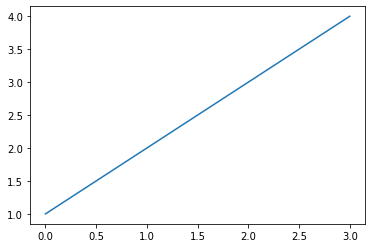

In [40]:
plt.plot([1,2,3,4]);

Vemos que directamente se abre una ventana nueva sin necesidad de llamar a `plt.show()`.

Si estamos en modo interactivo y queremos borrar todos los gráficos y títulos de la ventana podemos usar `plt.clf()` y nos volverá a dejar el ‘lienzo’ limpio.

Si seguimos en modo interactivo y queremos cerrar la ventana podemos usar `plt.close()`.

Imaginemos que trabajamos con varias ventanas de gráficos simultáneamente donde en una dibujemos un tipo de datos y en la otra un tipo de datos diferente. Si luego procuramos verlas simultáneamente, podemos asignar un nombre (o número) a las ventanas con las que vamos a trabajar. Veamos un ejemplo:

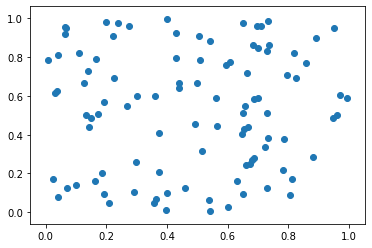

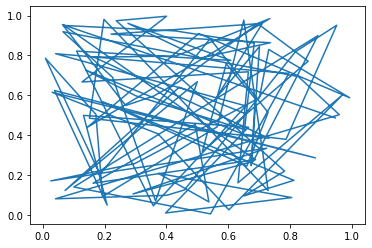

In [41]:
plt.figure('scatter') # Crea una ventana titulada 'scatter'
plt.figure('plot')    # Crea una ventana titulada 'plot'
a = np.random.rand(100) # Generamos un vector de valores aleatorios
b = np.random.rand(100) # Generamos otro vector de valores aleatorios
plt.figure('scatter') # Le decimos que la ventana activa en la que vamos a dibujar es la ventana 'scatter'
plt.scatter(a,b)  # Dibujamos un scatterplot en la ventana 'scatter'
plt.figure('plot') # Ahora cambiamos a la ventana 'plot'
plt.plot(a,b);

Es decir, podemos ir dibujando en varias ventanas a la vez. Podemos ademas cerrar una de las dos ventanas, limpiar la otra, crear una nueva. Haciendo una llamada a `plt.figure()` también podemos definir la resolución del gráfico, el tamaño de la figura.

Si deseamos disponer de varios gráficos en la misma ventana, recurrimos a `plt.subplot()`. Con `plt.subplot()` podemos indicar el número de filas y columnas que corresponderán a como dividimos la ventana. En el siguiente ejemplo se puede ver dos áreas de gráfico en la misma ventana:

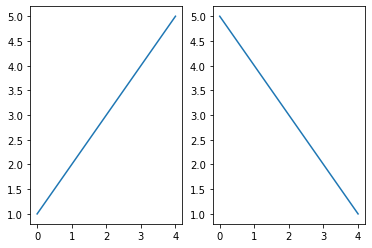

In [42]:
plt.ion()  # Nos ponemos en modo interactivo
plt.subplot(1,2,1)  # Dividimos la ventana en una fila y dos columnas y dibujamos el primer gráfico
plt.plot((1,2,3,4,5))
plt.subplot(1,2,2)  # Dividimos la ventana en una fila y dos columnas y dibujamos el segundo gráfico
plt.plot((5,4,3,2,1));

Por último, vamos a ver como configurar la sesión para ahorrarnos escribir código de más. Por ejemplo, imaginemos que deseamos que todas las líneas sean más gruesas por defecto, o que deseamos usar otro tipo de fuente sin escribirlo explícitamente cada vez que generamos un gráfico, o que deseamos guardar los gráficos con una resolución superior a la que viene por defecto. Para ello podemos usar `plt.rc()`, `plt.rcParams`, `plt.rcdefaults()`. En este caso vamos a usar `plt.rc()`. Para más información sobre como configurar matplotlib nos referimos a [este enlace](http://matplotlib.sourceforge.net/users/customizing.html). En el siguiente ejemplo vemos como funciona todo esto:

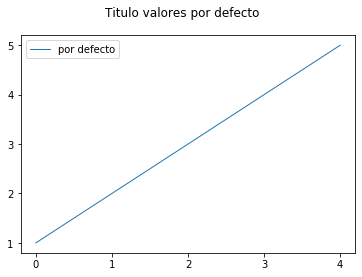

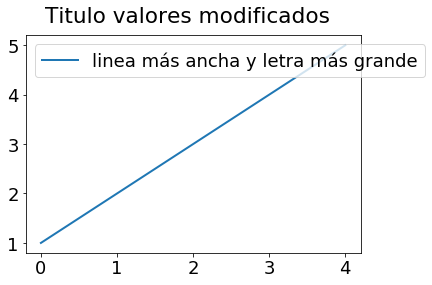

In [43]:
plt.ion()  # Nos ponemos en modo interactivo
plt.figure('valores por defecto')  # Creamos una ventana donde dibujamos el gráfico con la configuración por defecto
plt.rc('lines', linewidth = 1)  # A partir de aquí todas las líneas que dibujemos irán con ancho doble
plt.rc('font', size = 10)  # A partir de aquí las fuentes que aparezcan en cualquier gráfico en la misma sesión tendrán este tamaño
plt.suptitle('Titulo valores por defecto')  # Esto sirve para poner título dentro de la ventana
plt.plot((1,2,3,4,5), label = 'por defecto')  # Hacemos el plot
plt.legend(loc = 2)  # Colocamos la leyenda en la esquina superior izquierda

plt.rc('lines', linewidth = 2)  # A partir de aquí todas las líneas que dibujemos irán con ancho doble
plt.rc('font', size = 18)  # A partir de aquí las fuentes que aparezcan en cualquier gráfico en la misma sesión tendrán mayor tamaño
plt.figure('valores modificados')  # Creamos una ventana donde dibujamos el gráfico con la configuración por defecto
plt.suptitle('Titulo valores modificados')  # Esto sirve para poner título dentro de la ventana
plt.plot((1,2,3,4,5), label = u'linea más ancha y letra más grande')  # Hacemos el plot
plt.legend(loc = 2);  # Colocamos la leyenda en la esquina superior izquierda

La configuracion establecida al usar `plt.rc()` seguira siendo valida para toda la sesión a no ser que volvamos a modificarla explícitamente o a no ser que usemos `plt.rcdefaults()`, que devolverá todos los parámetros a los valores por defecto.

# Configuración del gráfico

En esta ocasión nos vamos a centrar en configurar el área del gráfico. Para ello vamos a empezar con `plt.axes()`, que sirve para *llamar* y/o configurar a un área de gráfico:

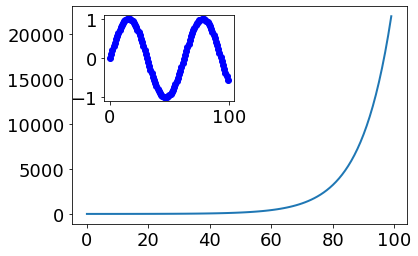

In [44]:
plt.axes()  # Coloca un área de gráfico con los valores por defecto
plt.plot(np.exp(np.linspace(0,10,100)))  # Dibuja una exponencial de 0 a 10
plt.axes([0.2,0.55,0.3,0.3])  # Dibuja una nueva área de gráfica con ancho y largo definido por [0.2,0.55,0.3,0.3]
plt.plot(np.sin(np.linspace(0,10,100)), 'b-o', linewidth = 2);

Si ahora deseamos borrar:

* el área del gráfico podemos usar `plt.delaxes()`;
* el contenido presente en el área del gráfico podemos usar `plt.cla()`;
* la ‘caja’ donde se dibuja el gráfico podemos usar `plt.box()`.

Podemos asimismo colocar una rejilla que nos ayude a identificar las áreas del gráfico mediante `plt.grid()`.

Notamos que `Matplotlib` dibuja los ejes de forma que se ajusten al gráfico; a fin de modificar esto podemos hacer uso de `plt.axis()`. Esta funcion nos permite definir la longitud y escala de los ejes. 

Si solo nos interesa configurar uno de los ejes y dejar que el otro lo maneje `Matplotlib` podemos usar `plt.xlim()`, `plt.xscale()`, `plt.ylim()` y `plt.yscale()`. Si queremos expresar el eje $x$ o el eje $y$ mediante escala logarítmica podemos usar, respectivamente, `plt.semilogx()` o `plt.semilogy()`. 

Podemos generar un segundo eje $x$ o un segundo eje $y$ usando `plt.twiny()` o `plt.twinx()`, respectivamente. También podemos establecer unos márgenes alrededor de los límites de los ejes usando `plt.margins()`. Por último, podemos etiquetar nuestros ejes con `plt.xlabel()` y `plt.ylabel()`. Veamos un ejemplo:

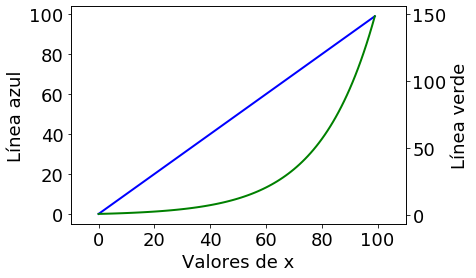

In [45]:
plt.plot(np.arange(100), 'b')  # Dibujamos una línea recta azul
plt.xlabel('Valores de x')  # Ponemos etiqueta al eje x
plt.ylabel(u'Línea azul')  # Ponemos etiqueta al eje y
plt.twinx()  # Creamos un segundo eje y
plt.plot(np.exp(np.linspace(0,5,100)), 'g')  # Dibuja una exponencial de 0 a 5 con la y representada en el segundo eje y
plt.ylabel(u'Línea verde')  # Ponemos etiqueta al segundo eje y
plt.xlim(-10,110);  # Limitamos los valores del eje x para que vayan desde -10 a 110

Imaginemos ahora que deseamos resaltar una zona del gráfico para focalizar la atención en esa área. Las funciones `plt.axvline()` y `plt.axhline()` dibujan líneas verticales y horizontales en las posiciones $x$ e $y$ que indiquemos, mientras que las funciones `plt.axvspan()` y `plt.axhspan()` dibujan recuadros entre las coordenadas $x$ e $y$ que indiquemos, respectivamente.

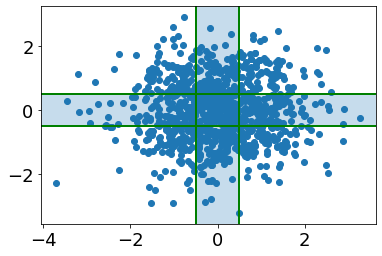

In [46]:
plt.scatter(np.random.randn(1000), np.random.randn(1000))  # Dibujamos un scatterplot de valores aleatorios
plt.axvline(-0.5, color = 'g')  # Dibujamos una línea vertical verde centrada en x = -0.5
plt.axvline(0.5, color = 'g')  # Dibujamos una línea vertical verde centrada en x = 0.5
plt.axhline(-0.5, color = 'g')  # Dibujamos una línea horizontal verde centrada en x = -0.5
plt.axhline(0.5, color = 'g')  # Dibujamos una línea horizontal verde centrada en x = 0.5
plt.axvspan(-0.5,0.5, alpha = 0.25)  #  Dibujamos un recuadro azul vertical entre x[-0.5,0.5] con transparencia 0.25
plt.axhspan(-0.5,0.5, alpha = 0.25);  #  Dibujamos un recuadro azul horizontal entre x[-0.5,0.5] con transparencia 0.25

A fin de controlar las etiquetas sobre el gráfico de forma básica y sencilla podemos recurrir a la funcion `plt.legend()`. Para usos avanzados recomendamos mirar [Stack Overflow](http://stackoverflow.com/a/4701285) y [Matplotlib legend guide](http://matplotlib.sourceforge.net/users/legend_guide.html). Si queremos asignar un título al gráfico podemos usar `plt.title()` y `plt.suptitle()`. Si queremos poner título a los ejes podemos usar `plt.xlabel()` y `plt.ylabel()` para los ejes $x$ e $y$, respectivamente. Por último, para controlar los valores de las etiquetas que se colocan sobre los ejes disponemos de `plt.locator_params()`, `plt.minorticks_on()`, `plt.minorticks_off()`, `plt.tick_params()`, `plt.tick_label_format()`, `plt.xticks()` y `plt.yticks()`. Vamos a manejar la mayor parte de estas funciones mediante el siguiente ejemplo. Imaginemos que deseamos representar el valor diario de una variable durante un año, mientras que en el eje $x$ ilustramos los meses en el día del año en que empieza el mes.

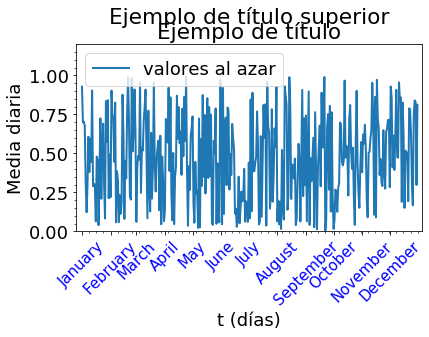

In [47]:
import calendar
dias = [np.array(calendar.mdays)[0:i].sum() + 1 for i in np.arange(12)+1]  # Para generar el lugar del primer día de cada mes en un año
meses = calendar.month_name[1:13]  # Creamos una lista con los nombres de los meses
plt.axes([0.1,0.2,0.8,0.65])
plt.plot(np.arange(1,366), np.random.rand(365), label = 'valores al azar')  # Creamos un plot con 365 valores
plt.xlim(-5,370)  # Los valores del eje x varian entre -5 y 370
plt.ylim(0,1.2)  # Los valores del eje y varian entre 0 y 1.2
plt.legend()  # Creamos la caja con la leyenda
plt.title(u'Ejemplo de título')  # Ponemos un título
plt.suptitle(u'Ejemplo de título superior')  # Ponemos un título superior
plt.minorticks_on()  # Pedimos que se vean sub-rayas de división en los ejes
plt.xticks(dias, meses, size = 'small', color = 'b', rotation = 45)  # Colocamos las etiquetas (meses) en las posiciones (dias) con color azul y rotadas 45º
plt.xlabel(u't (días)')
plt.ylabel('Media diaria');

# Tipos de gráfico (I)

En los ejemplos anteriores hemos estado viendo mucho `plt.plot()`, funcion que suele usarse para dibujar un gráfico simple de líneas representando los valores (x, f(x)). Ahora vamos a ver todas las posibilidades de `plt.plot()`.

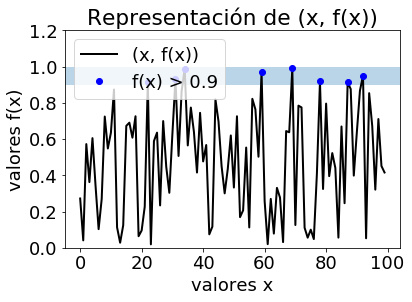

In [48]:
x = np.arange(100)  # Valores de x
y = np.random.rand(100)  # Valores de y
plt.plot(x,y, color = 'black', label = '(x, f(x))')  # Dibujamos la evolución de f(x), frente a x
plt.plot(x[y > 0.9], y[y > 0.9], 'bo', label = 'f(x) > 0.9')  # Destacamos los valores por encima de 0.9 colocándoles un marcador circular azul
plt.axhspan(0.9, 1, alpha = 0.3)  # Colocamos una banda de color para los valores f(x) > 0.9
plt.ylim(0,1.2)  # Limitamos el eje x
plt.legend()  # Colocamos la leyenda
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)');  # Colocamos la etiqueta en el eje y

Tipos de gráfico análogos a este son `plt.plot_date()`, que es similar a `plt.plot()` considerando uno o ambos ejes como fechas, y `plt.plotfile()`, que dibuja directamente desde los datos de un archivo.

Otro tipo de gráfico sería el que podemos obtener con `plt.stem()`, el cual dibuja líneas verticales desde una línea base. Imaginemos, por ejemplo, que tenemos una serie temporal, la normalizamos (restándole su media y dividiendo por su desviación estándar) de forma que nos queda una serie de media 0 y desviación estándar 1. Esta nueva serie la podemos representar con `plt.stem()` donde la línea horizontal representa el valor medio (en este caso la media sería 0) y las líneas verticales representan la desviacion del valor individual respecto de la media. Veamos un ejemplo con los valores por encima de la media en color verde y los valores por debajo de la media en color rojo.

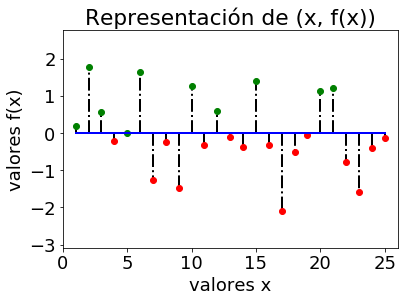

In [49]:
x = np.arange(25) + 1  # Valores de x
y = np.random.rand(25) * 10.  # Valores de y
y_norm = (y - y.mean()) / y.std()  # Valores de y normalizados. Esta nueva serie tiene media 0 y desviación estándar 1
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min(y_norm)-1, np.max(y_norm)+1)  # Colocamos los límites del eje y
plt.stem(x[y_norm > 0],y_norm[y_norm > 0], linefmt='k-.', markerfmt='go', basefmt='b-', use_line_collection=True)  # Dibujamos los valores por encima de la media
plt.stem(x[y_norm < 0],y_norm[y_norm < 0], linefmt='k-.', markerfmt='ro', basefmt='b-', use_line_collection=True)  # Dibujamos los valores por debajo de la media
plt.title(u'Representación de (x, f(x))')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores f(x)');  # Colocamos la etiqueta en el eje y

En algunos casos, nos interesa ver cuando una serie está por encima o por debajo de la otra. Para ello podemos usar `plt.fill_between()`. Imaginemos un ejemplo donde tenemos dos series temporales y queremos localizar fácilmente cuando la primera está por encima de la segunda y cuando está por debajo.

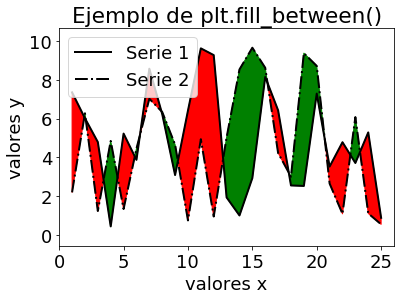

In [50]:
x = np.arange(25) + 1  # Valores de x
y1 = np.random.rand(25) * 10.  # Valores de y1
y2 = np.random.rand(25) * 10.  # Valores de y2
plt.xlim(np.min(x) - 1, np.max(x) + 1)  # Colocamos los límites del eje x
plt.ylim(np.min([y1, y2])-1, np.max([y1, y2])+1)  # Colocamos los límites del eje y
plt.plot(x, y1, 'k-', linewidth = 2, label = 'Serie 1')  # Dibujamos los valores de (x,y1) con una línea contínua
plt.plot(x, y2, 'k-.', linewidth = 2, label = 'Serie 2')  # Dibujamos los valores de (x,y2) con una línea de punto y raya
plt.fill_between(x, y1, y2, where = (y1 < y2), color = 'g', interpolate = True)  # Pinta polígonos color verde entre las líneas cuando y1 < y2 
plt.fill_between(x, y1, y2, where = (y1 > y2), color = 'r', interpolate = True)  # Pinta polígonos color rojo entre las líneas cuando y1 > y2
plt.legend()
plt.title('Ejemplo de plt.fill_between()')  # Colocamos el título del gráfico
plt.xlabel('valores x')  # Colocamos la etiqueta en el eje x
plt.ylabel('valores y');  # Colocamos la etiqueta en el eje y

Como vemos, cuando los valores de *y2* son mayores que los de *y1* dibuja polígonos verdes, en caso contrario dibuja polígonos rojos.

# Tipos de gráfico (II)

Consideremos ahora los gráficos de barras.
Para dibujar un [histograma](http://es.wikipedia.org/wiki/Histograma) podemos hacer uso de `plt.hist()`. Un histograma suele ser un gráfico de barras donde se representa la ocurrencia de datos (frecuencia) en intervalos definidos. Lo que hace `plt.hist()` es dibujar el histograma de un vector en función del número de intervalos (*bins*) que definamos. Comprobemos esto con un ejemplo de código a continuación. El resultado sería el siguiente, donde se representa el cálculo que efectua la función [`np.histogram`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html):

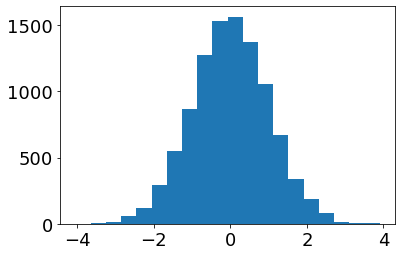

In [51]:
x = np.random.randn(10000)  # Definimos un vector de números aleatorios de una distribución normal
plt.hist(x, bins = 20);  # Dibuja un histograma dividiendo el vector x en 20 intervalos del mismo ancho

Podemos ensayar ademas [`np.histogram2d`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html#numpy.histogram2d), [`np.histogramdd`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogramdd.html#numpy.histogramdd) y [`np.bincount`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html#numpy.bincount).

Si en lugar de dibujar histogramas deseamos dibujar gráficos de barras para representar la evolución de la variable 'Ruido' en los últimos días podemos usar `plt.bar()`:

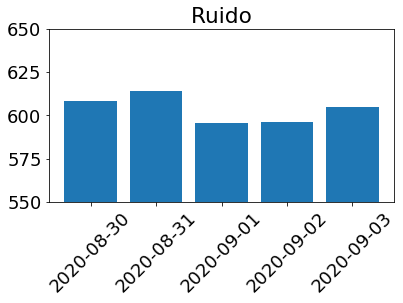

In [52]:
import datetime as dt  # Importamos el módulo datetime
prima = 600 + np.random.randn(5) * 10  # Valores inventados para la variable Ruido
fechas = (dt.date.today() - dt.timedelta(5)) + dt.timedelta(1) * np.arange(5) # generamos las fechas de los últimos cinco días
plt.axes((0.1, 0.3, 0.8, 0.6))  # Definimos la posición de los ejes
plt.bar(np.arange(5), prima)  # Dibujamos el gráfico de barras
plt.ylim(550,650)  # Limitamos los valores del eje y
plt.title('Ruido')  # Colocamos el título
plt.xticks(np.arange(5), fechas, rotation = 45);  # Colocamos las etiquetas del eje x; en este caso, las fechas

Por último consideremos `plt.step()`. Esta función nos permite dibujar un gráfico de *escaleras*. Ilustremos esto:

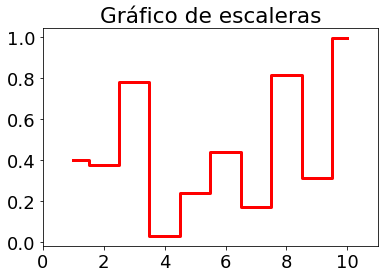

In [53]:
x = np.arange(10) + 1
y = np.random.rand(10)
plt.step(x, y, where = 'mid', color = 'r', linewidth = 3)
plt.title(u"Gráfico de escaleras")
plt.xlim(0,11);

# Tipos de gráfico (III)

Vamos a empezar por ver un gráfico tipo tarta (*pie chart*). En este caso el ejemplo se construye a partir de los datos de las visitas por países a un blog. El argumento `explode` nos permite separar porciones del centro de la tarta:

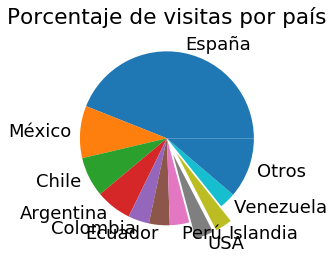

In [54]:
visitas = [43.97, 9.70, 7.42, 6.68, 3.91, 3.85, 3.62, 3.43, 3.16, 3.04] # Definimos un vector con el % de visitas del top ten de países
visitas = np.append(visitas, 100. - np.sum(visitas)) # Introducimos un último elemento que recoge el % de visitas de otros países fuera del top ten
paises = [u'España', u'México', 'Chile', 'Argentina', 'Colombia', 'Ecuador', u'Perú', 'USA', 'Islandia', 'Venezuela', 'Otros']  # Etiquetas para las porciones
explode = [0, 0, 0, 0, 0, 0, 0, 0.2, 0.2, 0, 0]  # Esto nos permite destacar algunas porciones
plt.pie(visitas, labels = paises, explode = explode)  # Dibuja un gráfico de porciones
plt.title(u'Porcentaje de visitas por país');

Consideramos ahora los graficos de contornos. Si los datos provienen de mallas regulares, empleamos `plt.contour()` y `plt.contourf()`, mientras que si los datos se distribuyen de forma irregular podemos hacer uso de `plt.tricontour()` y `plt.tricontourf()`. Abordemos el ejemplo siguiente: se dispone de una red de medidas (temperaturas) repartidas geográficamente en una zona. Se ha usado `plt.scatter()` para representar la posición de las estaciones de medida:

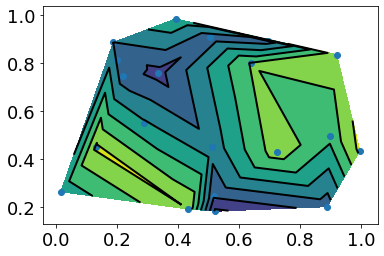

In [55]:
x = np.random.rand(20)  # posiciones X de nuestra red de medidas
y = np.random.rand(20)  # posiciones Y de nuestra red de medidas
t = np.random.rand(20)*3000  # valores de Temperatura (K) en las posiciones (X, Y)
plt.tricontourf(x, y, t)  # Pintamos las triangulaciones con contornos de color
plt.tricontour(x, y, t, colors = 'k')  # Pintamos las líneas de contorno en color negro
plt.scatter(x, y);  # Pintamos la posición de las estaciones de medida.

Por defecto usa una [triangulación de Delaunay](http://es.wikipedia.org/wiki/Triangulaci%C3%B3n_de_Delaunay) pero se puede definir el tipo de triangulación que queramos haciendo uso de `matplotlib.tri.triangulation`.

También podemos dibujar cuadros de valores que correspondan a una matriz en lugar de interpolar los valores mediante contornos. Puede suceder que el número de datos que tengamos en una malla regular sea bajo y una interpolación (usando `contour`, por ejemplo) dé resultados que no representan fielmente aquello que procuramos. En esos casos podemos usar `plt.matshow()`, la cual dibuja una matriz con cuadros de colores en función del valor de cada uno de los elementos de la matriz. El resultado se ilustra en el siguiente ejemplo:

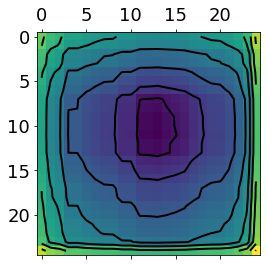

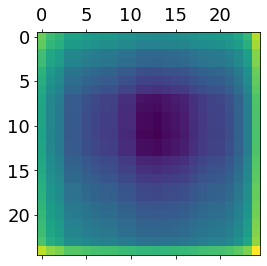

In [56]:
x = np.sort(np.random.randn(25))  # Valores de x que vamos a usar para crear la matriz
y = np.sort(np.random.randn(25))  # Valores de y que vamos a usar para crear la matriz
mat1, mat2 = np.meshgrid(x, y)  # Creamos dos matrices cuadradas que vamos a cruzar
mat = np.sqrt( mat1**2 + mat2 **2)  # Creamos una matriz final a partir de las dos anteriores
plt.matshow(mat)  # Representamos la última matriz con matshow
plt.contour(np.arange(25), np.arange(25), mat, 10, colors = 'k')  # Colocamos líneas de contorno para la matriz mat
plt.matshow(mat);  # Representamos la última matriz con matshow

Podemos experimentar con las funciones `plt.pcolor()`, `plt.pcolomesh()` y `plt.tripcolor()` las que brindan un proposito similar al anterior.

La funcion `plt.hexbin()` tiene en cuenta la ocurrencia en los intervalos que determinemos (esto mismo podemos hacer con `plt.matshow()` aunque tendremos que calcular previamente las frecuencias para cada recuadro). Vamos a representar el número de veces que los valores de dos series (x e y) se encuentran en determinado intervalo de datos:

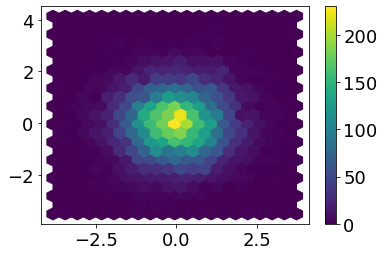

In [57]:
x = np.random.randn(10000)  # Creamos un vector de 10000 elementos distribuidos de forma normal
y = np.random.randn(10000)  # Creamos un vector de 10000 elementos distribuidos de forma normal
plt.hexbin(x,y, gridsize = 20)  # Representamos como están distribuidos bidimensionalmente 
plt.colorbar();  # Colocamos una barra de colores 

Por último consideramos gráficos de vectores (representados por *flechas*). Estos suelen emplearse para representar el movimiento de un fluido o partículas. En el siguiente ejemplo recurrimos a la funcion `plt.quiver()`:

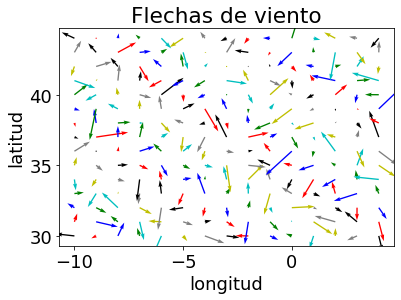

In [58]:
lon = np.arange(15) - 10.  # Creamos un vector de longitudes
lat = np.arange(15) + 30.  # Creamos un vector de latitudes
lon, lat = np.meshgrid(lon, lat)  # Creamos un array 2D para las longitudes y latitudes
u = np.random.randn(15 * 15)  # Componente x del vector viento que parte desde una lon y una lat determinada
v = np.random.randn(15 * 15)  # Componente y del vector viento que parte desde una lon y una lat determinada
colores = ['k','r','b','g','c','y','gray']  #  Definimos una serie de colores para las flechas
plt.title('Flechas de viento')  # Colocamos un título
plt.xlabel('longitud')  # Colocamos etiqueta para el eje x
plt.ylabel('latitud')  # Colocamos etiqueta para el eje y
plt.quiver(lon, lat, u, v, color = colores);  # Dibujamos las flechas

# Texto y anotaciones

En esta ocasión nos interesa incluir anotaciones y tablas en nuestros gráficos. Hasta ahora hemos visto algunas formas de tener anotaciones típicas para el título, los ejes, leyenda (`title`, `suptitle`, `xlabel`, `ylabel`, `figtext`, `legend`). En este caso vamos a revisar las posibilidades de escribir texto personalizado mediante el uso de [`plt.text`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.text), [`plt.arrow`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.arrow), [`plt.annotate`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.annotate) y [`plt.table`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.table).

Como caso sencillo para anotar texto en nuestro gráfico podemos usar `plt.text()`. En el siguiente ejemplo vamos a resaltar donde está el valor máximo y el valor mínimo de una serie de datos:

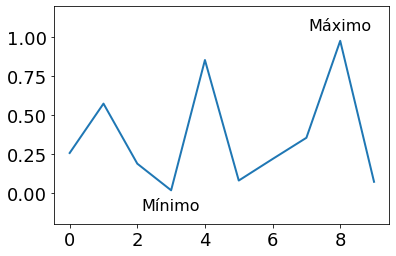

In [68]:
a = np.random.rand(10)  # Creamos una serie de 10 valores pseudo-aleatorios entre 0 y 1
plt.plot(a)  # Los dibujamos
plt.ylim(-0.2, 1.2)  # Definimos el rango de valores para el eje y
plt.text(np.argmin(a), np.min(a) - 0.1, u'Mínimo', 
         fontsize = 16, horizontalalignment='center', 
         verticalalignment='center')  # Colocamos texto cerca del valor donde se encuentra el mínimo
plt.text(np.argmax(a), np.max(a) + 0.1, u'Máximo', 
         fontsize = 16, horizontalalignment='center',
         verticalalignment='center');  # Colocamos texto cerca del valor donde se encuentra el máximo

Al anterior ejemplo le podemos incluir una flecha que una el texto con la representación del valor máximo y del valor mínimo. Para ello podemos usar `plt.arrow()` modificando ligeramente el anterior código:

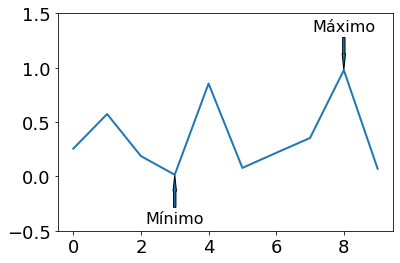

In [69]:
plt.plot(a)
plt.ylim(-0.5, 1.5)  # Extendemos un poco el rango del eje y
plt.text(np.argmax(a), np.max(a) + 0.4, u'Máximo', fontsize = 16, horizontalalignment='center', verticalalignment='center')  # Re-colocamos el texto del máximo
plt.text(np.argmin(a), np.min(a) - 0.4, u'Mínimo', fontsize = 16, horizontalalignment='center', verticalalignment='center')  # Re-colocamos el texto del mínimo
plt.arrow(np.argmax(a), np.max(a) + 0.3, 0, -0.3, length_includes_head = "True", shape = "full", width=0.07, head_width=0.1)  # Unimos el texto al valor representado
plt.arrow(np.argmin(a), np.min(a) - 0.3, 0, 0.3, length_includes_head = "True", shape = "full", width=0.07, head_width=0.1);  # Unimos el texto al valor representado

En `plt.arrow()` hemos de definir entre otros argumentos: la posicion del origen de la flecha, la distancia desde ese origen hasta el otro extremo de la flecha, si queremos que tenga cabecera.

La funcion `plt.annotate()` constituye una alternativa compacta y elegante como se ilustra en el ejemplo a continuacion:

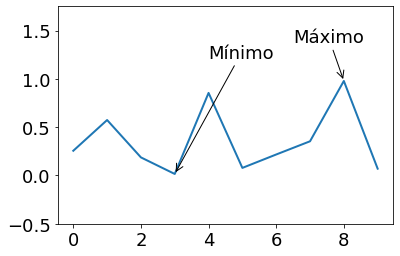

In [70]:
plt.plot(a)
plt.ylim(-0.5, 1.75)  # Extendemos el rango del eje y
plt.annotate(u'Máximo', xy = (np.argmax(a), np.max(a)), 
             xycoords = 'data', xytext = (np.argmax(a) - 1.5, 
             np.max(a) + 0.4), textcoords = 'data', arrowprops = dict(arrowstyle = "->"))
plt.annotate(u'Mínimo', xy = (np.argmin(a), np.min(a)), 
             xycoords = 'data', xytext = (np.argmin(a) + 1, 
             np.min(a) + 1.2), textcoords = 'data', arrowprops = dict(arrowstyle = "->"));

En `plt.annotate()` introducimos la cadena de caracteres a mostrar, indicamos hacia donde apuntará esa cadena de caracteres (*xy*), especificamos el sistema de referencia (*xycoords*) siendo posible usar el correspondiente a los datos, píxeles o puntos. Ademas, indicamos la posición del texto (*xytext*), y como se representará la flecha.

Por último, veremos como incrustar en el grafico una tabla de forma sencilla haciendo uso de la funcion `plt.table()`. Nos referimos a un [ejemplo extraido de Stack Overflow](http://stackoverflow.com/questions/8524401/how-can-i-place-a-table-on-a-plot-in-matplotlib):

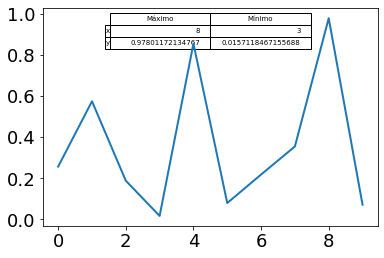

In [71]:
valores = [[np.argmax(a), np.argmin(a)], [np.max(a), np.min(a)]]
etiquetas_fil = ('x', 'y')
etiquetas_col = (u'Máximo', u'Mínimo')
plt.plot(a)
plt.table(cellText=valores, rowLabels=etiquetas_fil, colLabels = etiquetas_col, colWidths = [0.3]*len(a), loc='upper center');

Aqui hemos definido los valores de las celdas internas (*cellText*), las etiquetas de filas y columnas (*rowLabels* y *colLabels*), el ancho de las celdas (*colWidths*) y la localización de la tabla (*loc*).

# Leyendo imágenes y guardando gráficos

En el siguiente ejemplo procuramos incrustar una imagen de fondo en nuestro gráfico para luego guardar la imagen resultante:

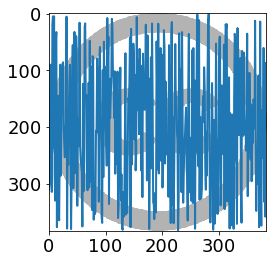

In [63]:
background = plt.imread('../imgs/cclarge.png')  # Leemos la imagen que queremos usar de fondo
x = np.arange(background.shape[1])  # Definimos valores de x
y = np.random.rand(background.shape[0]) * background.shape[0]  # Definimos valores de y
plt.plot(x, y)  # Dibujamos la serie
plt.imshow(background, alpha = 0.3)  # Creamos el fondo con una transparencia de 0.3 (1 es opaco y 0 es transparente)
plt.savefig('../imgs/cclarge_con_fondo.png');

La funcion [`plt.imread()`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.imread) nos permite leer una imagen y convertirla en un *numpy array* que más tarde podemos utilizar como queramos (en este caso, como fondo para la imagen). La funcion [`plt.imshow()`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.imshow) nos posibilita mostrar la imagen en pantalla. Por último, la funcion [`plt.savefig()`](http://matplotlib.sourceforge.net/api/pyplot_api.html#matplotlib.pyplot.savefig) nos permite guardar cualquiera de las figuras que hemos ido creando a lo largo de todo el tutorial. Modificando sus argumentos es posible definir la resolución de la imagen, el formato de salida (por defecto, `Matplotlib` solo permite los formatos *png*, *eps*, *ps*, *png* y *svg*), la orientación de la figura. 

In [1]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())